In [2]:
pip install Scikit-Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Scikit-Fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2c98190daebc8acc5bf2c7bc470588bf611475afcacc4f4748e5fd21ffea583a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built Scikit-Fuzzy


<ipython-input-5-e33b42e13fb2>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'z',offset =9,cmap = 'viridis',anpha=0.5)
<ipython-input-5-e33b42e13fb2>:79: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'x',offset =11,cmap = 'viridis',anpha=0.5)
<ipython-input-5-e33b42e13fb2>:80: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'y',offset =11,cmap = 'viridis',anpha=0.5)


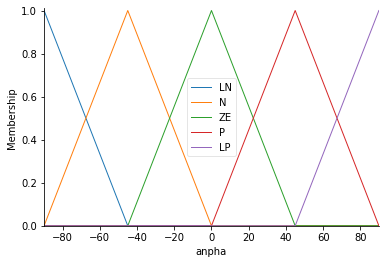

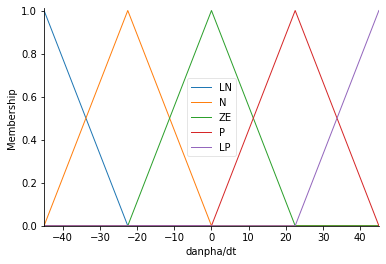

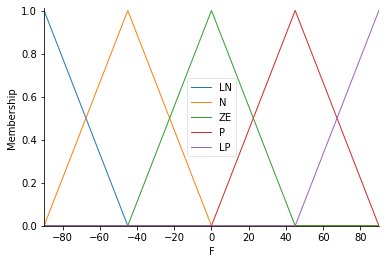

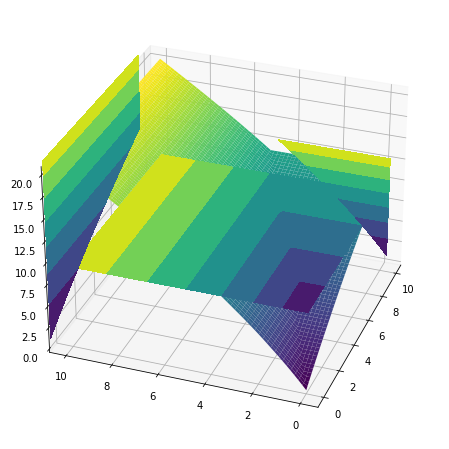

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import axes3d


universe = np.linspace(-90,90,61)
universe1 = np.linspace(-45,45,61)
universe2 = np.linspace(-90,90,61)

anpha = ctrl.Antecedent(universe,'anpha')
Danpha = ctrl.Antecedent(universe1,'danpha/dt') 
F = ctrl.Consequent(universe2,'F')

names = ['LN','N','ZE','P','LP']
anpha.automf(names = names)  
Danpha.automf(names = names)
F.automf(names = names)
anpha.view()
Danpha.view()
F.view()


rule1= ctrl.Rule(antecedent=(
                             (anpha['LN']&Danpha['LN'])   |
                             (anpha['N']&Danpha['LN'])    |
                             (anpha['N']&Danpha['N']))     ,consequent=F['LN'],label='rule LN')

rule2= ctrl.Rule(antecedent=((anpha['ZE']&Danpha['LN'])   |
                             (anpha['P']&Danpha['LN']) |  (anpha['N']&Danpha['N'])| (anpha['ZE']&Danpha['N'])|
                             (anpha['LN']&Danpha['ZE'])|
                             (anpha['LN']&Danpha['P'])|
                             (anpha['LN']&Danpha['LP'])
                            ),consequent=F['N'],label='rule N')
rule3= ctrl.Rule(antecedent=((anpha['LP']&Danpha['N']) |
                             (anpha['LP']&Danpha['LN']) | 
                             (anpha['P']&Danpha['N'])|
                             (anpha['ZE']&Danpha['ZE'])|
                             (anpha['ZE']&Danpha['LP'])
                            ),consequent=F['ZE'],label='rule ZE')
rule4= ctrl.Rule(antecedent=((anpha['LP']&Danpha['ZE']) |
                             (anpha['P']&Danpha['ZE']) | 
                             (anpha['N']&Danpha['P'])|
                             (anpha['ZE']&Danpha['P'])|
                             (anpha['ZE']&Danpha['LP'])
                            ),consequent=F['P'],label='rule P')

rule5= ctrl.Rule(antecedent=((anpha['LP']&Danpha['P']) |
                             (anpha['LP']&Danpha['LP']) | 
                             (anpha['P']&Danpha['P'])|
                             (anpha['P']&Danpha['LP'])
                          
                            ),consequent=F['P'],label='rule P')


system = ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z=np.zeros_like(x)


for i in range(61):
    for j in range(61):
        sim.input['anpha'] = x[i,j]
        sim.input['danpha/dt'] = y[i,j]
        sim.compute()
        z[i,j] = sim.output['F']

 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride =1 ,cstride =1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x,y,z,zdir = 'z',offset =9,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'x',offset =11,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'y',offset =11,cmap = 'viridis',anpha=0.5)
ax.view_init(30,200)



